# Find non-melt area

Find non-melt area based on 6 years worth of summer data: Jun-Aug 2017-2019 or do May-September?

Opt data available: 01 05 17 - 31 10 2019

Mw data available: 1960? - 2022


google warmest periods; google warmest mean summer, google warmest years. 
In August 2021, the record temperature of 23.6 °C was reported here.

In [2]:
import numpy as np
import xarray
import pandas as pd

from os.path import isfile, join
from os import listdir

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib

In [3]:
# paths 
mw_path  = r"../Data/microwave-rs/non_melt_testing/mw_interpolated/"
path_out = r"../Data/microwave-rs/non_melt_testing/non_melt_indexes/"
path_out_share = r"../AWS_Data/Data/split_indexes/"

In [4]:
# should convert processing notebooks into functions to run as scripts here

## Functions:

In [5]:
def raster_to_pandas(data):
    data = data.to_dataframe().reset_index()[['x', 'y', 'band_data']]
    return data

In [6]:
def remove_data(data):
    data = data[~data['band_data'].isin([-1, 1])]
    data = data[['x', 'y']]
    return data

In [7]:
def merge_dfs(mw_files):
    df_season = []
    
    for mw_file in mw_files:
        #print(mw_file[:10])
        data_mw = xarray.open_dataarray(mw_path + mw_file)
        df = raster_to_pandas(data_mw)
        df = remove_data(df)

        if len(df_season) == 0:
            df_season = df
        else:
            df_season = pd.merge(df_season, df, how = 'inner', on = ['y', 'x'])

        del data_mw    
        del df

    return df_season

## Run in 6 batches (years):

In [14]:
mw_files = [f for f in listdir(mw_path) if isfile(join(mw_path, f))]
years = ['2017', '2018', '2019', '2020', '2021', '2022']

separate = False
cummulative = True

dict_of_df = []
df_all = []
for year_ in years:
    print(year_)
    list_season_dates = [i for i in mw_files if i.startswith(year_)]
    df_season = merge_dfs(list_season_dates)

    if separate:
        df_season['year'] = year_
        dict_of_df.append(df_season)

    if cummulative:
        if len(df_all) == 0:
            df_season['year'] = year_
            df_all = df_season
            dict_of_df.append(df_all)
        else:
            df_all = pd.merge(df_all, df_season, how = 'inner', on = ['y', 'x'])
            df_all['year'] = year_
            dict_of_df.append(df_all)
                    
        del df_season

all = pd.concat(dict_of_df, ignore_index=True)

2017
2018
2019
2020
2021
2022


write

In [17]:
#all.to_parquet(path_out + "melt_separate.parquet")
all.to_parquet(path_out + "melt_cummulative.parquet")

## Load

In [8]:
all_c = pd.read_parquet(path_out + "melt_cummulative.parquet")
#all_s = pd.read_parquet(path_out + "melt_separate.parquet")

Creating grey backgound

In [9]:
gray_df = raster_to_pandas(xarray.open_dataarray(mw_path + '2017-06-06_mw.tif'))
gray_df = gray_df[gray_df['band_data']!= -1] # no water in gray 
gray_df.loc[gray_df['band_data'] == 1, ['band_data']] = 0 # set all values to 0 

## Plotting seasonal changes 

#### Separate:

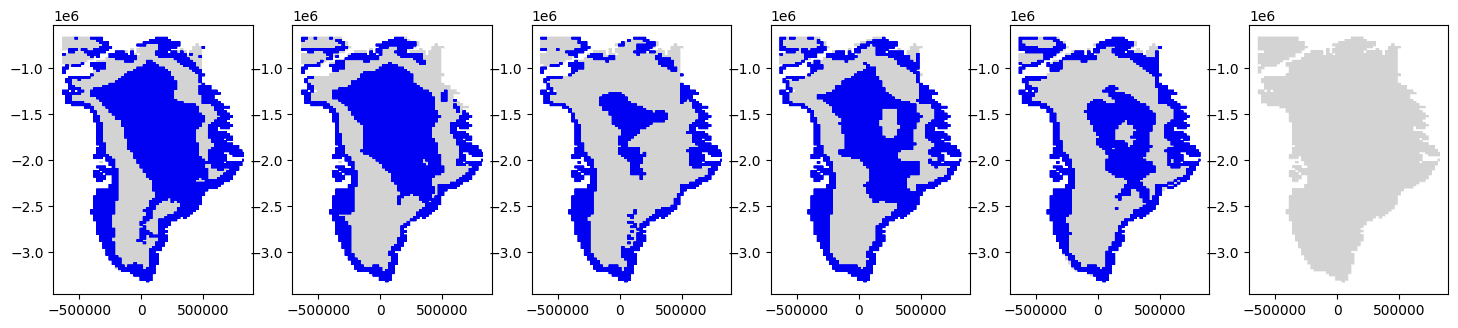

In [11]:
df17_s = all_s[all_s['year'] == '2017']
df18_s = all_s[all_s['year'] == '2018']
df19_s = all_s[all_s['year'] == '2019']
df20_s = all_s[all_s['year'] == '2020']
df21_s = all_s[all_s['year'] == '2021']
df22_s = all_s[all_s['year'] == '2022']


fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = [3*6, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax[0].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[0].scatter(df17_s["x"], df17_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[1].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[1].scatter(df18_s["x"], df18_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[2].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[2].scatter(df19_s["x"], df19_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[3].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[3].scatter(df20_s["x"], df20_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[4].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[4].scatter(df21_s["x"], df21_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[5].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[5].scatter(df22_s["x"], df22_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
# give year names

#### Cummulative:

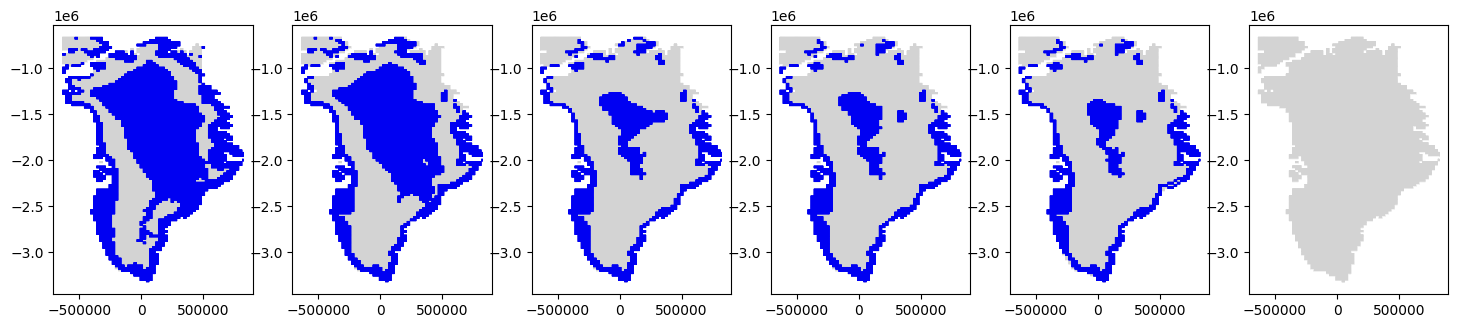

In [8]:
df17_c = all_c[all_c['year'] == '2017']
df18_c = all_c[all_c['year'] == '2018']
df19_c = all_c[all_c['year'] == '2019']
df20_c = all_c[all_c['year'] == '2020']
df21_c = all_c[all_c['year'] == '2021']
df22_c = all_c[all_c['year'] == '2022']

fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = [3*6, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax[0].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[1].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[2].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[3].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[4].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[5].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)

ax[0].scatter(df17_c["x"], df17_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[1].scatter(df18_c["x"], df18_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[2].scatter(df19_c["x"], df19_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[3].scatter(df20_c["x"], df20_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[4].scatter(df21_c["x"], df21_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[5].scatter(df22_c["x"], df22_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')


2022 files seem to be corrupted

#### Test

In [ ]:
melt_df = gray_df[gray_df['band_data']==  1]

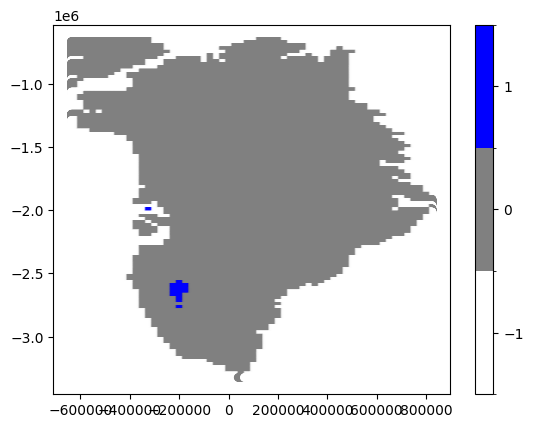

In [19]:
fig, ax = plt.subplots()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","grey","blue"]) #cmap = plt.cm.Greys
norm = colors.BoundaryNorm(np.arange(-1.5, 1.7, 1), cmap.N)
test = ax.scatter(melt_df["x"], melt_df["y"],  c=melt_df["band_data"], norm=norm, edgecolor='none', cmap=cmap) #, s=100
plt.colorbar(test, ax=ax, ticks=np.linspace(-1, 1, 3, endpoint = True)) # ticks=np.linspace(-2, 2, 5)

''

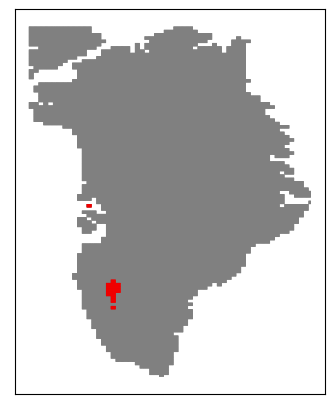

In [191]:
fig, ax = plt.subplots(figsize = [4, 5])
#cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
#norm = colors.BoundaryNorm(np.arange(-1.5, 0.7, 1), cmap.N)
#ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray) # ,norm=norm,
ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'grey') # ,norm=norm,

ax.scatter(melt_df["x"], melt_df["y"],  edgecolor='none', s = 0.05, color = 'red', label = 'melt')
#x.legend(loc="upper right")
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])
;
#plt.colorbar(test, ax=ax, ticks=np.linspace(-1, 0, 2, endpoint = True)) # ticks=np.linspace(-2, 2, 5)

## Get melt and non-melt areas

Cummulative melt in 2021; never melting areas:

In [10]:
noMelt = all_c[all_c['year'] == '2021'][['x', 'y']]

# buffer?

In [11]:
print(f'Percentage of all area that never melts: {round((len(noMelt)/ len(gray_df))*100, 2)}%')

Percentage of all area that never melts: 23.04%


Inverse of noMelt - yesMelt

(melting areas to be considered in cv splits)

In [30]:
temp_ = gray_df[gray_df['band_data'] != -1].merge(noMelt, how = 'left', on  = ['x', 'y'], indicator=True) # create col indicating if pixel is in noMelt data
yesMelt = temp_[temp_['_merge'] == 'left_only'][['x',	'y']] # create inverse of noMelt - yesMelt (left_only - not in noMelt file)

In [31]:
temp_['melt'] = np.where(temp_['_merge']=='both', 0, 1)
temp_ = temp_[['x', 'y', 'melt']]

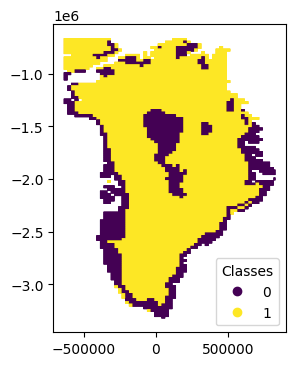

In [27]:
#plot
fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
#ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')

scatter = ax.scatter(temp_["x"], temp_["y"], c = temp_["melt"],  edgecolor='none', s = 0.05)
handles, labels = scatter.legend_elements()
#labels = ['24.45', 'other', 'c', 'd', 'e', 'f'] # percantages
legend1 = ax.legend(handles, labels, title="Classes", loc="lower right")

#### Plot noMelt areas and inverse:


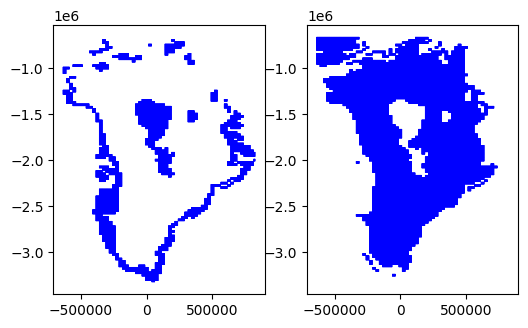

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = [3*2, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax[0].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[1].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)


ax[0].scatter(noMelt["x"], noMelt["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[1].scatter(yesMelt["x"], yesMelt["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

#### Saving indexes of never-melting areas:

In [32]:
#noMelt.to_parquet(path_out + "noMelt_indexes.parquet", index = False)
temp_.to_parquet(path_out_share + "noMelt_indexes.parquet", index = False)

## Spatial CV splits

### Visual Split

Split into similar size areas for cv based on visual splitting in *Area testing* section

In [47]:
melt_areas = yesMelt.copy()
melt_areas['area'] = np.nan
melt_areas.loc[(melt_areas['y'] >= -1412000.0) & (melt_areas['x'] <= 142500.0), 'area'] = 1
melt_areas.loc[(melt_areas['y'] >= -1660500.0) & (melt_areas['x'] >  142500.0), 'area'] = 2
melt_areas.loc[(melt_areas['y'] <  -1412000.0) & (melt_areas['x'] <= 142500.0) & (melt_areas['y'] >= -2398000.0), 'area'] = 3
melt_areas.loc[(melt_areas['y'] <  -1660500.0) & (melt_areas['x'] >  142500.0) & (melt_areas['y'] >= -2398000.0), 'area'] = 4
melt_areas.loc[ melt_areas['y'] <  -2398000.0, 'area'] = 5
#melt_areas.loc[(melt_areas['y'] >  -1000000.0) & (melt_areas['x'] < -300000.0), 'area'] = 0  # to take care of corner


melt_areas['area'] = melt_areas['area'].astype(int)

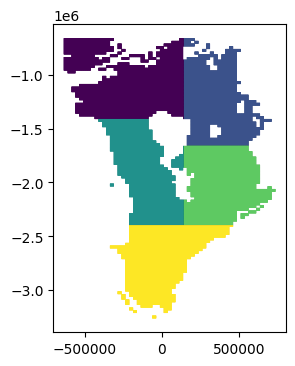

In [48]:
#plot
fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
#ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')

scatter = ax.scatter(melt_areas["x"], melt_areas["y"], c = melt_areas["area"],  edgecolor='none', s = 0.05)

In [49]:
# safe without subsplits:
melt_areas.to_parquet(path_out + "cv_split.parquet", index = False)
melt_areas.to_parquet(path_out_share + "cv_split.parquet", index = False)

#### Split into sub-areas for nested cv 

###### simple lines (not implemented for inner split)

In [122]:
# num_subareas = 5
# melt_areas = melt_areas.sort_values(by=['area', 'y'])

# subareas_dict = (melt_areas.groupby('area')['y'].apply(lambda x: len(x)/num_subareas)).to_dict()
# all_subareas = []
# for i in range(1, len(subareas_dict)+1): # for all areas
#     subareas_ = np.repeat([i for i in range(num_subareas)], [subareas_dict[i]])  # create 5 sub-areas (num_subareas)
#     all_subareas.append(subareas_)
# subareas = [j for i in all_subareas for j in i ]

# melt_areas['subarea'] = subareas
# melt_areas['area_subarea'] = (melt_areas['area'].astype(str) + melt_areas['subarea'].astype(str)).astype(int)

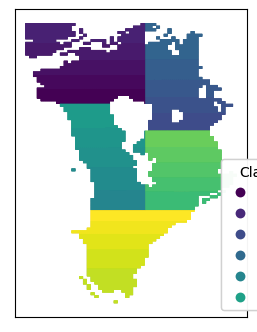

In [128]:
# fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
# scatter = ax.scatter(melt_areas["x"], melt_areas["y"], c = melt_areas["area_subarea"],  edgecolor='none', s = 0.05)
# handles, labels = scatter.legend_elements()
# labels = ['24.45', 'other', 'c', 'd', 'e', 'f'] # percantages
# legend1 = ax.legend(handles, labels, title="Classes", loc="lower right")
# legend1.set_bbox_to_anchor((1., 0., 0.3, 0.2)) # antras virsus apacia # pirmas i apacia desinej (1., 0., 0.2, 0.2)
# ax.add_artist(legend1)
# ax.axes.yaxis.set_ticklabels([])
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticks([])
# ax.axes.xaxis.set_ticks([])
# plt.show()

###### kmeans for inner split (not implemented either)

In [15]:
num_subareas = 5
melt_areas = melt_areas.sort_values(by=['area', 'y'])
all_subareas = []
for i in range(melt_areas['area'].nunique()): # for all areas
    area = melt_areas[melt_areas['area'] == i]
    kmeans = KMeans(n_clusters=num_subareas, random_state=0, n_init="auto").fit(area)
    all_subareas.append(kmeans.labels_)
subareas = [j for i in all_subareas for j in i ]

melt_areas['subarea'] = subareas
melt_areas['area_subarea'] = (melt_areas['area'].astype(str) + melt_areas['subarea'].astype(str)).astype(int)

test which area is closest to Canada corner and assign

In [16]:
# melt_areas_x = melt_areas[melt_areas['area_subarea'] == 14]
# fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
# ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')
# scatter = ax.scatter(melt_areas_x["x"], melt_areas_x["y"], c = melt_areas_x["area_subarea"],  edgecolor='none', s = 0.05)

In [17]:
melt_areas.loc[melt_areas['area'] == 0, 'area_subarea'] = 14

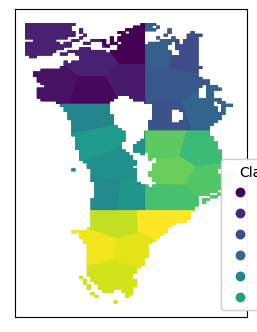

In [18]:
#melt_areas.loc[(melt_areas['y'] >  -1000000.0) & (melt_areas['x'] < -300000.0), 'area'] = 0  

#a1_label = f'{len(area_1) / len(yesMelt) * 100}%'


fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
#ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')

scatter = ax.scatter(melt_areas["x"], melt_areas["y"], c = melt_areas["area_subarea"],  edgecolor='none', s = 0.05)

handles, labels = scatter.legend_elements()
labels = ['24.45', 'other', 'c', 'd', 'e', 'f'] # percantages
legend1 = ax.legend(handles, labels, title="Classes", loc="lower right")
#leg = ax.get_legend()
legend1.set_bbox_to_anchor((1., 0., 0.3, 0.2)) # antras virsus apacia # pirmas i apacia desinej (1., 0., 0.2, 0.2)
ax.add_artist(legend1)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])
#plt.legend(loc="lower right")
#fig.savefig('samplefigure', bbox_extra_artists=(legend1,), bbox_inches='tight')
plt.show()

# remove ticks and stuff
# add labels & legend
# probably do that in one table instead of 6 and assign col and do c , and do manual colors?
 # round
 # fix legend again...by area and not subareas

##### write
(outer split - visual, inner splits - kmeans)

In [19]:
# commented bc saved before - no inner split needed
# melt_areas.to_parquet(path_out + "cv_split.parquet", index = False)
# melt_areas.to_parquet(path_out_share + "cv_split.parquet", index = False)

### K-means split ( not implemented for outer split)

Problems kmeans for outer split: doesnt cluster geographically, not equal splits.

In [18]:
melt_areas2 = yesMelt.copy()

In [32]:
melt_areas3 = melt_areas2.loc[~((melt_areas2['y'] >  -1000000.0) & (melt_areas2['x'] < -300000.0))]
           #       melt_areas.loc[(melt_areas['y'] >  -1000000.0) & (melt_areas['x'] < -300000.0), 'area'] = 0  this only before plotting


In [33]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(melt_areas3)
melt_areas3['areas2'] = kmeans.labels_

In [35]:
melt_areas3['areas2'].value_counts()

1    396365
0    375423
3    318640
2    312721
4    265326
Name: areas2, dtype: int64

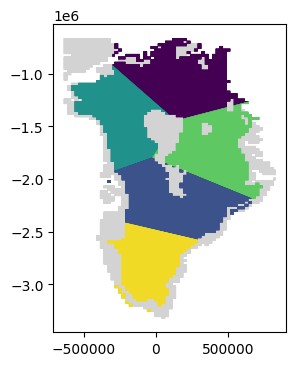

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))

ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')
scatter = ax.scatter(melt_areas3["x"], melt_areas3["y"], c = melt_areas3["areas2"],  edgecolor='none', s = 0.05)

#handles, labels = scatter.legend_elements()
#labels = ['24.45', 'other', 'c', 'd', 'e', 'f'] # percantages
#legend1 = ax.legend(handles, labels, title="Classes", loc="lower right")
#leg = ax.get_legend()
#legend1.set_bbox_to_anchor((1., 0., 0.3, 0.2)) # antras virsus apacia # pirmas i apacia desinej (1., 0., 0.2, 0.2)
#ax.add_artist(legend1)
# ax.axes.yaxis.set_ticklabels([])
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticks([])
# ax.axes.xaxis.set_ticks([])
#plt.legend(loc="lower right")
#fig.savefig('samplefigure', bbox_extra_artists=(legend1,), bbox_inches='tight')
plt.show()

# remove ticks and stuff
# add labels & legend
# probably do that in one table instead of 6 and assign col and do c , and do manual colors?
 # round
 # fix legend again...by area and not subareas

### Area testing

This area amounts to about 19.034925160370634 % 


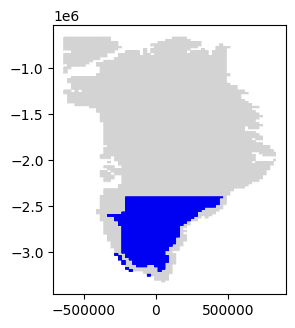

In [102]:
t1 = yesMelt[yesMelt['y'] < -2398000.0]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

This area amounts to about 42.87064861012117 % 


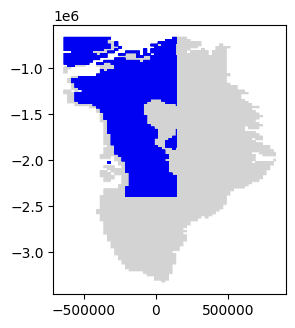

In [119]:
t1 = yesMelt[(yesMelt['y'] > -2398000.0) & (yesMelt['x'] < 142500.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

In [134]:
(42.87064861012117 -4.8)/2 + 4.8

23.83532430506059

This area amounts to about 23.848210976478974 % 


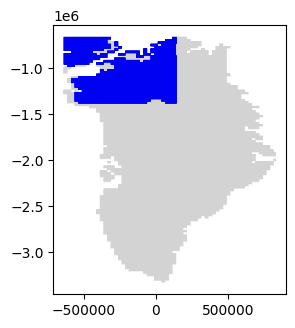

In [153]:
t1 = yesMelt[(yesMelt['y'] > -1384000.0) & (yesMelt['x'] < 142500.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

This area amounts to about 19.33833214540271 % 


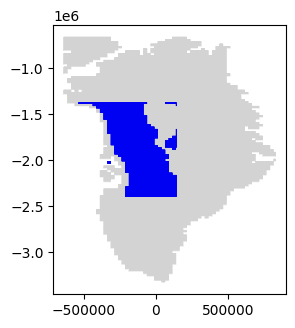

In [164]:
t1 = yesMelt[(yesMelt['y'] < -1374000.0) & (yesMelt['x'] < 142500.0) & (yesMelt['y'] > -2398000.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

This area amounts to about 18.423036350677123 % 


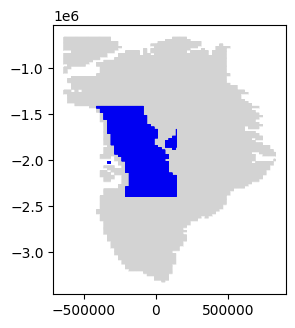

In [179]:
t1 = yesMelt[(yesMelt['y'] < -1412000.0) & (yesMelt['x'] < 142500.0) & (yesMelt['y'] > -2398000.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

This area amounts to about 38.03392729864576 % 


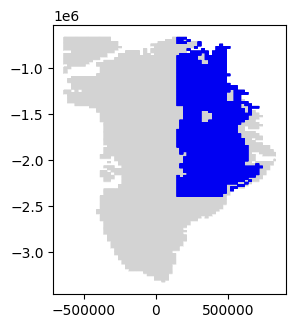

In [120]:
t1 = yesMelt[(yesMelt['y'] > -2398000.0) & (yesMelt['x'] > 142500.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

In [121]:
38.03392729864576/2

19.01696364932288

This area amounts to about 19.020669992872417 % 


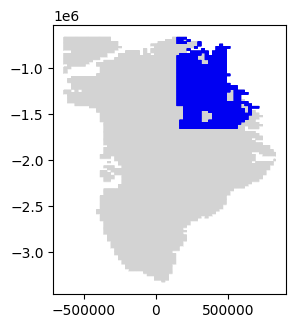

In [132]:
t1 = yesMelt[(yesMelt['y'] > -1660500.0) & (yesMelt['x'] > 142500.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

This area amounts to about 18.990449037776195 % 


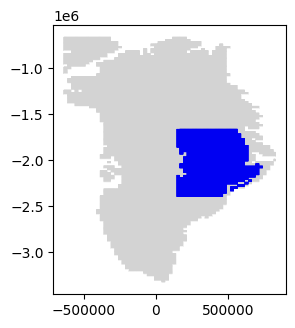

In [158]:
t1 = yesMelt[(yesMelt['y'] < -1660500.0) & (yesMelt['x'] > 142500.0) & (yesMelt['y'] > -2398000.0)]
print(f'This area amounts to about {len(t1) / len(yesMelt) * 100} % ')

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(t1["x"], t1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
plt.show()

/mnt/c/Users/linas/OneDrive/Documents/ITU/Semester3/RP_Greenland/RP_Greenland/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


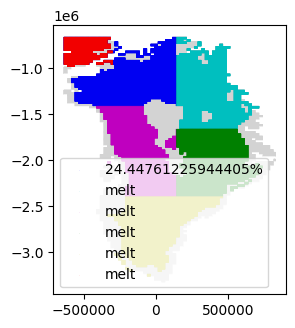

In [182]:
area_1 = yesMelt[(yesMelt['y'] > -1412000.0) & (yesMelt['x'] < 142500.0)]
area_2 = yesMelt[(yesMelt['y'] > -1660500.0) & (yesMelt['x'] > 142500.0)]
area_3 = yesMelt[(yesMelt['y'] < -1412000.0) & (yesMelt['x'] < 142500.0) & (yesMelt['y'] > -2398000.0)]
area_4 = yesMelt[(yesMelt['y'] < -1660500.0) & (yesMelt['x'] > 142500.0) & (yesMelt['y'] > -2398000.0)]
area_5 = yesMelt[yesMelt['y'] < -2398000.0]
area_x = yesMelt[(yesMelt['y'] > -1000000.0) & (yesMelt['x'] < -300000.0)]

a1_label = f'{len(area_1) / len(yesMelt) * 100}%'


fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = [3, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
#ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt') # ,norm=norm,

ax.scatter(area_1["x"], area_1["y"],  edgecolor='none', s = 0.05, color = 'blue', label = a1_label, label = 'not in opt data')
ax.scatter(area_2["x"], area_2["y"],  edgecolor='none', s = 0.05, color = 'c', label = 'melt')
ax.scatter(area_3["x"], area_3["y"],  edgecolor='none', s = 0.05, color = 'm', label = 'melt')
ax.scatter(area_4["x"], area_4["y"],  edgecolor='none', s = 0.05, color = 'g', label = 'melt')
ax.scatter(area_5["x"], area_5["y"],  edgecolor='none', s = 0.05, color = 'y', label = 'melt')
ax.scatter(area_x["x"], area_x["y"],  edgecolor='none', s = 0.05, color = 'red', label = 'melt')
plt.legend(loc="lower right")
plt.show()

# remove ticks and stuff
# add labels & legend
# probably do that in one table instead of 6 and assign col and do c , and do manual colors?
 # round